# Exploratory Data Analysis

This notebook will give us a deep dive into the dataset to understand the trends and the limits of it (adpoted from [here](https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools)).

This time the cleaned dataset is under consideration:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv("../data/processed/clean_train.csv")
train

,clean_content,cyber_label,environmental_issue
0,It is a process that puts a heavier burden\nof...,0,0
1,Unsure/NANot at all confident\nSomewhat confid...,0,0
2,IIA Netherlands paper Climate change\nand envi...,0,0
3,They are also prone to fraud; between January ...,1,0
4,Nothing in the arrangements or rules of the BD...,0,0
...,...,...,...
1003,"0102030405060708090100\nHealth, safety and sec...",0,0
1004,Risk 10\n10203040506070800\n1020304050607080\n...,0,0
1005,"Moreover, leaders view\ncloud and XaaS as crit...",0,0
1006,Additional pressure\non staff from waves of co...,0,0


In [3]:
test = pd.read_csv("../data/processed/clean_test.csv")
test

,clean_content
0,More recently there has been a focus on risks ...
1,Energy crisis\n3. Business interruption\nThe i...
2,The survey results indicate that a lack of ski...
3,Respondents could\nselect more than one risk.0...
4,The interest payable on\nthe country's public ...
...,...
137,Negative No impact Positive Unsure\nNo changes...
138,"In Ethiopia, Kenya, and Somalia, for example, ..."
139,"artificial intelligence, automation in all of ..."
140,Personal Data Regulatory\nFragmentation\nThe r...


In [4]:
train.shape

(1008, 3)

In [5]:
test.shape

(142, 1)

# Analyzing text statistics
Text statistics visualizations are simple but very insightful techniques. 

They include:

- word frequency analysis,
- sentence length analysis,
- average word length analysis,
- etc.


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   clean_content        1008 non-null   object
 1   cyber_label          1008 non-null   int64 
 2   environmental_issue  1008 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.8+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_content  142 non-null    object
dtypes: object(1)
memory usage: 1.2+ KB


In [8]:
train.describe()

,cyber_label,environmental_issue
count,1008.00000,1008.000000
mean,0.08631,0.213294
std,0.28096,0.409837
min,0.00000,0.000000
25%,0.00000,0.000000
50%,0.00000,0.000000
75%,0.00000,0.000000
max,1.00000,1.000000


In [9]:
test.describe()

,clean_content
count,142
unique,142
top,More recently there has been a focus on risks ...
freq,1


<Axes: >

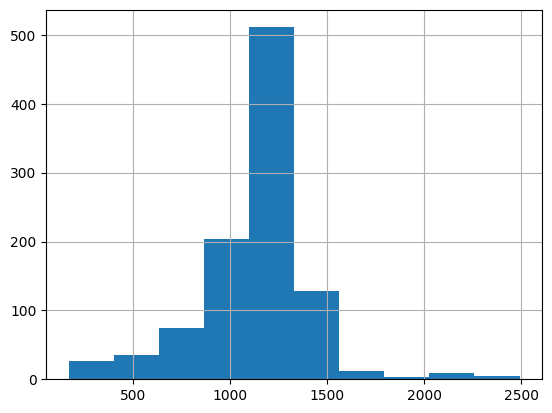

In [10]:
train['clean_content'].str.len().hist()

<Axes: >

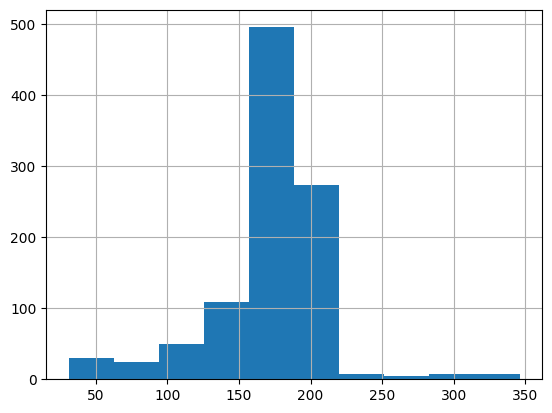

In [11]:
train['clean_content'].str.split().map(lambda x: len(x)).hist()

<Axes: >

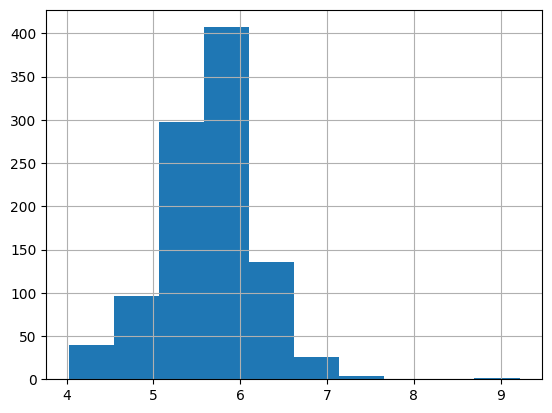

In [12]:
train['clean_content'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
# word lengths

In [13]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

len(stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/giyaseddin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [14]:
corpus=[]
content_texts = train['clean_content'].str.split()

content_texts = content_texts.values.tolist()
corpus = [word for i in content_texts for word in i]  # flatten
len(corpus)

172415

Reduced from 231881

<Axes: >

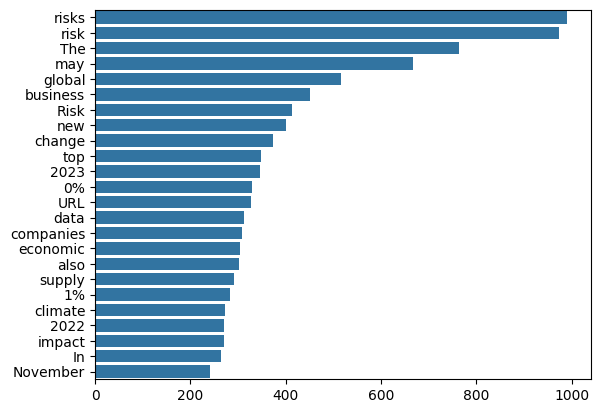

In [15]:
from collections import Counter
counter = Counter(corpus)
mostcommon = counter.most_common()

x, y= [], []
for word, count in mostcommon[:60]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

# Ngram exploration
Ngrams are simply contiguous sequences of n words. For example “riverbank”,” The three musketeers” etc.If the number of words is two, it is called bigram. For 3 words it is called a trigram and so on.

Looking at most frequent n-grams can give you a better understanding of the context in which the word was used.



In [16]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None, top=10):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top]


<Axes: >

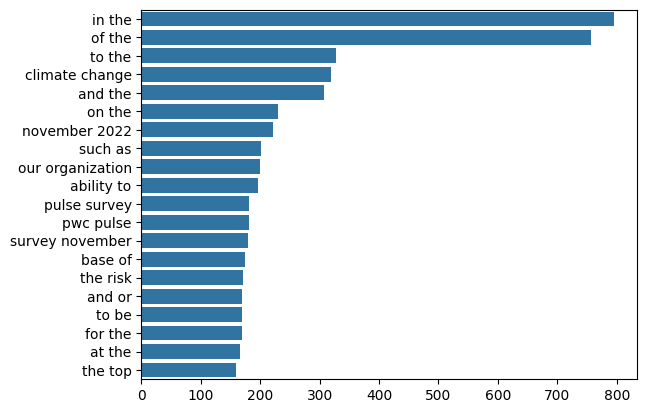

In [17]:
top_n_bigrams = get_top_ngram(train['clean_content'], 2, top=20)

x,y = map(list, zip(*top_n_bigrams))

sns.barplot(x=y,y=x)

E.g. Supply chain and climate change are clearly present in the dataset

<Axes: >

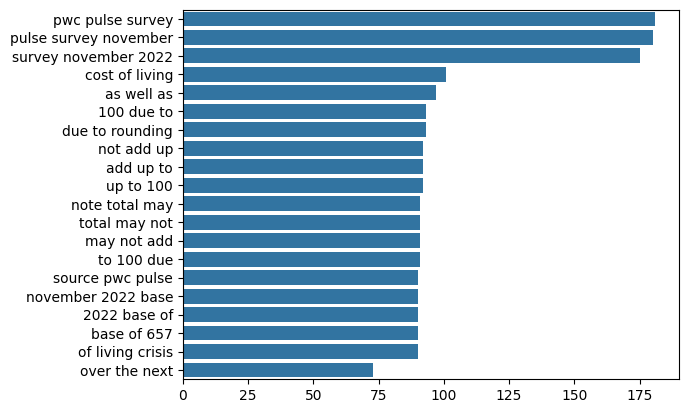

In [18]:
top_n_bigrams = get_top_ngram(train['clean_content'],3, top=20)

x,y = map(list, zip(*top_n_bigrams))

sns.barplot(x=y,y=x)

In [19]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(series):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for content in series:
        words=[w for w in word_tokenize(content) if (w not in stopwords)]

        words=[lem.lemmatize(w) for w in words if len(w)>2]

        corpus.append(words)
    return corpus

prepr_corpus=preprocess_text(train['clean_content'])

print(len(prepr_corpus))
prepr_corpus[:2]

[nltk_data] Downloading package punkt to /home/giyaseddin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/giyaseddin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


1008


[['process',
  'put',
  'heavier',
  'burden',
  'work',
  'auditees',
  'must',
  'prepared',
  'work',
  'closely',
  'internal',
  'audit',
  'function',
  'share',
  'knowledge',
  'That',
  'includes',
  'detail',
  'model',
  'deployed',
  'complex',
  'increase',
  'level',
  'specialist',
  'knowledge',
  'needed',
  'within',
  'internal',
  'audit',
  'team',
  'One',
  'roundtable',
  'attendee',
  'said',
  'brought',
  'skill',
  'initially',
  'external',
  'supplier',
  'However',
  'organisation',
  'digitalised',
  'decided',
  'create',
  'dedicated',
  'team',
  'expert',
  'inhouse',
  'internal',
  'audit',
  'could',
  'buy',
  'day',
  'DIGITAL',
  'DISRUPTION',
  'AND',
  'NEW',
  'TECHNOLOGY',
  'internal',
  'exchange',
  'system',
  'While',
  'worked',
  'well',
  'finding',
  'subject',
  'matter',
  'expert',
  'business',
  'area',
  'affected',
  'remained',
  'challenging',
  'The',
  'European',
  'Union',
  'proposal',
  'draft',
  'regulation',
  'ar

# Wordcloud
Wordcloud is a great way to represent text data. The size and color of each word that appears in the wordcloud indicate it’s frequency or importance.



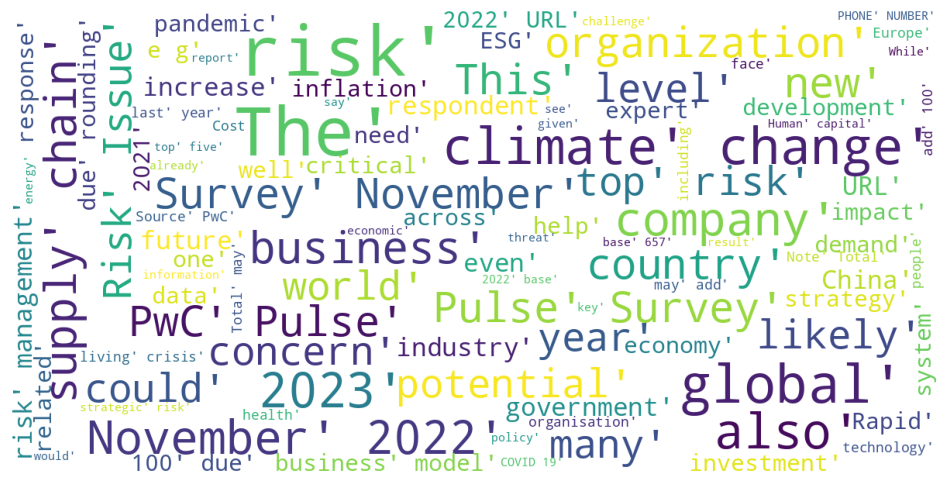

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=42
    )

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(prepr_corpus)


# Exploring through text complexity
It can be very informative to know how readable (difficult to read) the text is and what type of reader can fully understand it. Do we need a college degree to understand the message or a first-grader can clearly see what the point is?

You can actually put a number called readability index on a document or text. Readability index is a numeric value that indicates how difficult (or easy) it is to read and understand a text.

This complexity will give me a hint on how much to expect the algirithms to understand and differentiate between the documents

<Axes: >

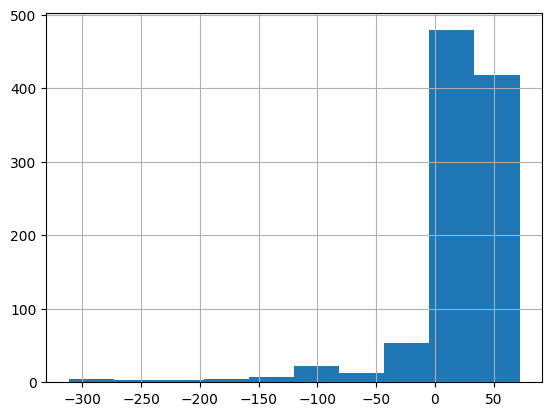

In [21]:
from textstat import flesch_reading_ease

train['clean_content'].apply(lambda x : flesch_reading_ease(x)).hist()

<Axes: >

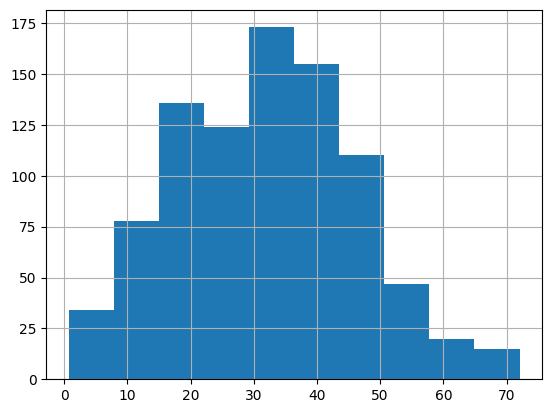

In [22]:
ease = train['clean_content'].apply(lambda x : flesch_reading_ease(x))
ease[(ease < 100) & (ease > 0)].hist()

In [23]:
reading = train['clean_content'].apply(lambda x : flesch_reading_ease(x))
reading

0        39.67
1      -100.74
2        12.43
3        34.29
4        47.83
         ...  
1003   -141.69
1004     34.36
1005     24.37
1006     24.79
1007     29.59
Name: clean_content, Length: 1008, dtype: float64

In [24]:
x=[i for i in range(len(reading)) if reading[i]<50]
train.iloc[x]['clean_content'].head(2).to_list()

["It is a process that puts a heavier burden\nof work on the auditees because they\nmust be prepared to work closely with the\ninternal audit function to share knowledge.\nThat includes details of the AI models they\nhave deployed, which can be complex and\nincreases the level of specialist knowledge\nneeded within the internal audit team.\nOne roundtable attendee said he had\nbrought in these skills initially from\nan external supplier. However, as the\norganisation digitalised it had decided\nto create a dedicated team of experts inhouse that internal audit could buy days\nDIGITAL DISRUPTION\nAND NEW TECHNOLOGY\nfrom through an internal exchange system.\nWhile that worked well, finding subject\nmatter experts in the business areas\naffected by AI remained challenging.\nThe European Union's proposal for draft\nregulation on artificial intelligence, which\nwas published in 2021, is well underway.\nThat is likely to require certification for\nAI models and business areas that are\nconsi

In [25]:
train.iloc[x]['clean_content'].to_list()[::-1][:2]

["priorities\nResetting risk\nmanagement\npriorities\nGlobal Technology Industry Risk Study 2023\npriorities22\nContents\npriorities3\nForeword\nAfter more than a decade of strong growth, the technology industry is going through a reset, triggered mainly by\nshifting economic realities.\nGlobal economies are slowing, and access to capital is pausing as investors assess the economic landscape.\nSupply chain issues are affecting hardware sales, and tech companies are announcing layoffs at levels not seen\nin 20 years.\nOur Global Technology Industry Risk Study 2023 shows how economic uncertainty is affecting risk management at\ntechnology companies as they focus on resetting priorities to respond to existing and emerging risks.\nTo understand technology companies' responses to global economic uncertainty, we surveyed over 300 risk\nmanagement leaders from 29 countries across six continents. We thank all of our respondents for taking the\ntime to answer our questions.\nWe hope this year's

Check some more examples..

In [26]:
x=[i for i in range(len(reading)) if reading[i]>20]
train.iloc[x]['clean_content'].head(2).to_list()


["It is a process that puts a heavier burden\nof work on the auditees because they\nmust be prepared to work closely with the\ninternal audit function to share knowledge.\nThat includes details of the AI models they\nhave deployed, which can be complex and\nincreases the level of specialist knowledge\nneeded within the internal audit team.\nOne roundtable attendee said he had\nbrought in these skills initially from\nan external supplier. However, as the\norganisation digitalised it had decided\nto create a dedicated team of experts inhouse that internal audit could buy days\nDIGITAL DISRUPTION\nAND NEW TECHNOLOGY\nfrom through an internal exchange system.\nWhile that worked well, finding subject\nmatter experts in the business areas\naffected by AI remained challenging.\nThe European Union's proposal for draft\nregulation on artificial intelligence, which\nwas published in 2021, is well underway.\nThat is likely to require certification for\nAI models and business areas that are\nconsi